## Initial Dependency Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score

In [2]:
# Import data:
df = pd.read_csv("../../Resources/emissions_since1961_total_data.csv")
df.head()

,country,country_code,year,total,coal,oil,gas,cement,flaring,other,population,per_capita,temp_change
0,Australia,AUS,1961,90.503896,59.974780,29.115323,0.000000,1.413794,0.0,NaN,10483000,8.614547,0.151
1,Australia,AUS,1962,94.823455,61.485584,31.884128,0.003664,1.450079,0.0,NaN,10742000,8.852126,0.118
2,Australia,AUS,1963,100.934264,63.727952,35.658048,0.007328,1.540936,0.0,NaN,10950000,9.245287,-0.111
3,Australia,AUS,1964,108.875767,67.133213,39.943584,0.007328,1.791642,0.0,NaN,11167000,9.780775,-0.029
4,Australia,AUS,1965,120.852669,71.059616,47.906800,0.007328,1.878925,0.0,NaN,11388000,10.638962,0.121


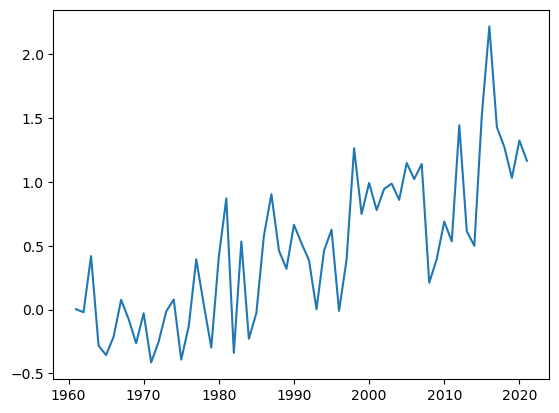

In [3]:
# Plotting USA year and temp_change values to visualize some of the data:
USA = df[df['country']=='USA']
plt.plot(USA['year'], USA['temp_change'])
plt.show()

## Data Set Exploration and Transforming:

In [4]:
# Print out the number of countries and which countries are available in the data set:
print(f" There are {len(df['country'].unique())} countries:")
print(df['country'].unique())
print("")
print(f"Country codes: \n{df['country_code'].unique()}")

 There are 46 countries:
['Australia' 'Austria' 'Belarus' 'Belgium' 'Brazil' 'Bulgaria' 'Canada'
 'China' 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark' 'Estonia' 'Finland'
 'France' 'Germany' 'Greece' 'Hungary' 'Iceland' 'Ireland' 'Italy' 'Japan'
 'Kazakhstan' 'Latvia' 'Liechtenstein' 'Lithuania' 'Luxembourg' 'Malta'
 'Netherlands' 'New Zealand' 'Norway' 'Poland' 'Portugal' 'South Korea'
 'Romania' 'Russia' 'Slovakia' 'Slovenia' 'Spain' 'Sweden' 'Switzerland'
 'Turkey' 'Ukraine' 'United Kingdom' 'USA' 'Global']

Country codes: 
['AUS' 'AUT' 'BLR' 'BEL' 'BRA' 'BGR' 'CAN' 'CHN' 'HRV' 'CYP' 'CZE' 'DNK'
 'EST' 'FIN' 'FRA' 'DEU' 'GRC' 'HUN' 'ISL' 'IRL' 'ITA' 'JPN' 'KAZ' 'LVA'
 'LIE' 'LTU' 'LUX' 'MLT' 'NLD' 'NZL' 'NOR' 'POL' 'PRT' 'KOR' 'ROU' 'RUS'
 'SVK' 'SVN' 'ESP' 'SWE' 'CHE' 'TUR' 'UKR' 'GBR' 'USA' 'WLD']


In [5]:
# Checking info for value alignments:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2806 entries, 0 to 2805
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       2806 non-null   object 
 1   country_code  2806 non-null   object 
 2   year          2806 non-null   int64  
 3   total         2806 non-null   float64
 4   coal          2777 non-null   float64
 5   oil           2777 non-null   float64
 6   gas           2777 non-null   float64
 7   cement        2776 non-null   float64
 8   flaring       2777 non-null   float64
 9   other         1530 non-null   float64
 10  population    2806 non-null   int64  
 11  per_capita    2806 non-null   float64
 12  temp_change   2385 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 285.1+ KB


- Null values in columns: coal, oil, gas, cement, flaring, other, and temp_change.
- "Other" column contains the most null values

In [6]:
# Check for missing coal, gas, oil, cement values:
print(f"Missing coal values: {df[df['coal'].isnull()]['country'].unique()}")
print(f"Missing gas values: {df[df['gas'].isnull()]['country'].unique()}")
print(f"Missing oil values: {df[df['oil'].isnull()]['country'].unique()}")
print(f"Missing cememnt values: {df[df['cement'].isnull()]['country'].unique()}")
print(f"Missing flaring values: {df[df['flaring'].isnull()]['flaring'].unique()}")

Missing coal values: ['Liechtenstein']
Missing gas values: ['Liechtenstein']
Missing oil values: ['Liechtenstein']
Missing cememnt values: ['Iceland' 'Liechtenstein']
Missing flaring values: [nan]


- Most null values are from Liechtenstein

In [7]:
# Filling 2021 Iceland cement value since we don't want it dropped in the next steps:
df[(df['country'] == 'Iceland') & (df['year'] == 2021)] = df[(df['country'] == 'Iceland') & (df['year'] == 2021)].fillna(value=0)

In [8]:
# Grabbing only temp_change column values with data:
df_temp_full = df[df['temp_change'].notnull()]
df_temp_full.head()

,country,country_code,year,total,coal,oil,gas,cement,flaring,other,population,per_capita,temp_change
0,Australia,AUS,1961,90.503896,59.974780,29.115323,0.000000,1.413794,0.0,NaN,10483000,8.614547,0.151
1,Australia,AUS,1962,94.823455,61.485584,31.884128,0.003664,1.450079,0.0,NaN,10742000,8.852126,0.118
2,Australia,AUS,1963,100.934264,63.727952,35.658048,0.007328,1.540936,0.0,NaN,10950000,9.245287,-0.111
3,Australia,AUS,1964,108.875767,67.133213,39.943584,0.007328,1.791642,0.0,NaN,11167000,9.780775,-0.029
4,Australia,AUS,1965,120.852669,71.059616,47.906800,0.007328,1.878925,0.0,NaN,11388000,10.638962,0.121


In [9]:
# Grabbing rest of data that != NA:
df_full = df_temp_full[df_temp_full['cement'].notnull()]
df_full.head()

,country,country_code,year,total,coal,oil,gas,cement,flaring,other,population,per_capita,temp_change
0,Australia,AUS,1961,90.503896,59.974780,29.115323,0.000000,1.413794,0.0,NaN,10483000,8.614547,0.151
1,Australia,AUS,1962,94.823455,61.485584,31.884128,0.003664,1.450079,0.0,NaN,10742000,8.852126,0.118
2,Australia,AUS,1963,100.934264,63.727952,35.658048,0.007328,1.540936,0.0,NaN,10950000,9.245287,-0.111
3,Australia,AUS,1964,108.875767,67.133213,39.943584,0.007328,1.791642,0.0,NaN,11167000,9.780775,-0.029
4,Australia,AUS,1965,120.852669,71.059616,47.906800,0.007328,1.878925,0.0,NaN,11388000,10.638962,0.121


In [10]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2805
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       2356 non-null   object 
 1   country_code  2356 non-null   object 
 2   year          2356 non-null   int64  
 3   total         2356 non-null   float64
 4   coal          2356 non-null   float64
 5   oil           2356 non-null   float64
 6   gas           2356 non-null   float64
 7   cement        2356 non-null   float64
 8   flaring       2356 non-null   float64
 9   other         1486 non-null   float64
 10  population    2356 non-null   int64  
 11  per_capita    2356 non-null   float64
 12  temp_change   2356 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 257.7+ KB


- Other column missing quite a few values.. will fill those rows with zero since the info is important

In [11]:
# Filling NA values == 0:
df2 = df_full.fillna(value=0)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2805
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       2356 non-null   object 
 1   country_code  2356 non-null   object 
 2   year          2356 non-null   int64  
 3   total         2356 non-null   float64
 4   coal          2356 non-null   float64
 5   oil           2356 non-null   float64
 6   gas           2356 non-null   float64
 7   cement        2356 non-null   float64
 8   flaring       2356 non-null   float64
 9   other         2356 non-null   float64
 10  population    2356 non-null   int64  
 11  per_capita    2356 non-null   float64
 12  temp_change   2356 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 257.7+ KB


- Non-Null Count matches up, woo.

## Encoding

In [12]:
country_encoding = {}

num = 1

for country in df2[df2['year'] == 2021].sort_values(by='total')['country']:
    country_encoding[country] = num
    num += 1
    
print(country_encoding)

{'Liechtenstein': 1, 'Malta': 2, 'Iceland': 3, 'Latvia': 4, 'Cyprus': 5, 'Luxembourg': 6, 'Estonia': 7, 'Slovenia': 8, 'Lithuania': 9, 'Croatia': 10, 'Denmark': 11, 'New Zealand': 12, 'Switzerland': 13, 'Slovakia': 14, 'Sweden': 15, 'Ireland': 16, 'Finland': 17, 'Portugal': 18, 'Norway': 19, 'Bulgaria': 20, 'Hungary': 21, 'Greece': 22, 'Belarus': 23, 'Austria': 24, 'Romania': 25, 'Belgium': 26, 'Czech Republic': 27, 'Netherlands': 28, 'Ukraine': 29, 'Spain': 30, 'Kazakhstan': 31, 'France': 32, 'Poland': 33, 'Italy': 34, 'United Kingdom': 35, 'Australia': 36, 'Turkey': 37, 'Brazil': 38, 'Canada': 39, 'South Korea': 40, 'Germany': 41, 'Japan': 42, 'Russia': 43, 'USA': 44, 'China': 45, 'Global': 46}


In [13]:
# Apply this encoding to create a new numerical column for the countries - called country_num
df2['country_num'] = df2['country'].apply(lambda x: country_encoding[x])
df2.head()

,country,country_code,year,total,coal,oil,gas,cement,flaring,other,population,per_capita,temp_change,country_num
0,Australia,AUS,1961,90.503896,59.974780,29.115323,0.000000,1.413794,0.0,0.0,10483000,8.614547,0.151,36
1,Australia,AUS,1962,94.823455,61.485584,31.884128,0.003664,1.450079,0.0,0.0,10742000,8.852126,0.118,36
2,Australia,AUS,1963,100.934264,63.727952,35.658048,0.007328,1.540936,0.0,0.0,10950000,9.245287,-0.111,36
3,Australia,AUS,1964,108.875767,67.133213,39.943584,0.007328,1.791642,0.0,0.0,11167000,9.780775,-0.029,36
4,Australia,AUS,1965,120.852669,71.059616,47.906800,0.007328,1.878925,0.0,0.0,11388000,10.638962,0.121,36


In [14]:
# Make country_num the first column and get rid of the categorical country and country_code columns
df_final = df2[['country_num', 'year', 'total', 'coal', 'oil', 
                      'gas', 'cement', 'flaring', 'other', 'population', 
                      'per_capita', 'temp_change']]
df_final.head()

,country_num,year,total,coal,oil,gas,cement,flaring,other,population,per_capita,temp_change
0,36,1961,90.503896,59.974780,29.115323,0.000000,1.413794,0.0,0.0,10483000,8.614547,0.151
1,36,1962,94.823455,61.485584,31.884128,0.003664,1.450079,0.0,0.0,10742000,8.852126,0.118
2,36,1963,100.934264,63.727952,35.658048,0.007328,1.540936,0.0,0.0,10950000,9.245287,-0.111
3,36,1964,108.875767,67.133213,39.943584,0.007328,1.791642,0.0,0.0,11167000,9.780775,-0.029
4,36,1965,120.852669,71.059616,47.906800,0.007328,1.878925,0.0,0.0,11388000,10.638962,0.121


In [15]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2805
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country_num  2356 non-null   int64  
 1   year         2356 non-null   int64  
 2   total        2356 non-null   float64
 3   coal         2356 non-null   float64
 4   oil          2356 non-null   float64
 5   gas          2356 non-null   float64
 6   cement       2356 non-null   float64
 7   flaring      2356 non-null   float64
 8   other        2356 non-null   float64
 9   population   2356 non-null   int64  
 10  per_capita   2356 non-null   float64
 11  temp_change  2356 non-null   float64
dtypes: float64(9), int64(3)
memory usage: 239.3 KB


## Supervised Machine Learning - Regression 

In [16]:
X_train = df_final[df_final['year'] < 2012].drop(columns='temp_change')
X_test = df_final[df_final['year'] >= 2012].drop(columns='temp_change')
y_train = df_final[df_final['year'] < 2012]['temp_change']
y_test = df_final[df_final['year'] >= 2012]['temp_change']

In [17]:
# Scale and fit training data:
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Linear Regression:

In [21]:
# LinearRegression fit & predict:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

In [23]:
# calculate MSE:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Evaluating model (RMSE):
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

Mean Squared Error: 0.4106415538120043
Root Mean Squared Error: 0.6408131972829557


### RandomForest:

In [34]:
# RandomForest fit & predict:
model2 = RandomForestRegressor()
model2.fit(X_train_scaled, y_train)

y_pred_RF = model2.predict(X_test_scaled)

In [35]:
# calculate MSE:
mse2 = mean_squared_error(y_test, y_pred_RF)
print(f"Mean Squared Error: {mse}")

# Evaluating model (RMSE):
rmse2 = np.sqrt(mse2)
print(f"Root Mean Squared Error: {rmse2}")

Mean Squared Error: 0.4106415538120043
Root Mean Squared Error: 0.8373692971786053


## Visualizing the models:

In [36]:
# Predict the training set values as well - Linear Regression 
y_train_pred = model.predict(X_train_scaled)

# Predict the training set values as well - Random Forest Regression
y_train_pred_RFC = model2.predict(X_train_scaled)

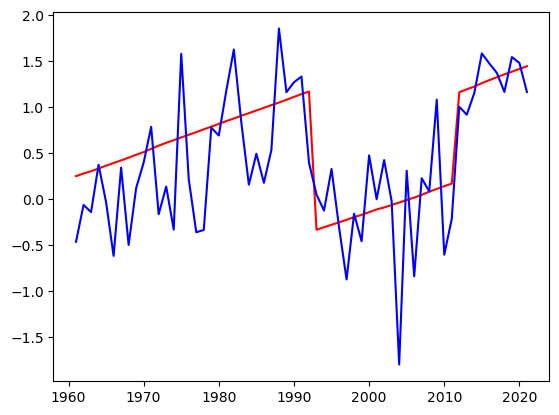

In [37]:
# LogisticRegression
years = range(1961,2022)
plt.plot(years, np.concatenate((y_train_pred[204:255], y_pred[40:50])), c='red')
plt.plot(years, np.concatenate((y_train[204:255], y_test[40:50])), c='blue')
plt.show()

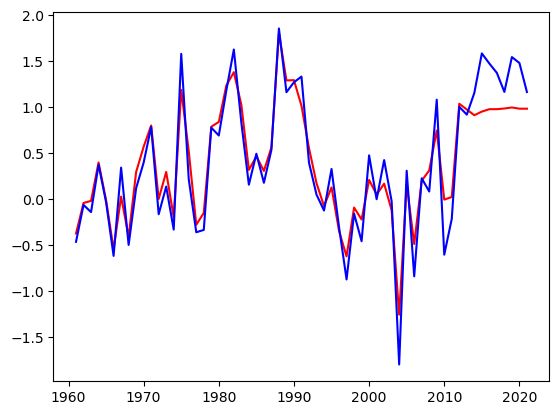

In [40]:
# RandomForest
years = range(1961,2022)
plt.plot(years, np.concatenate((y_train_pred_RFC[204:255], y_pred_RF[40:50])), c='red')
plt.plot(years, np.concatenate((y_train[204:255], y_test[40:50])), c='blue')
plt.show()